### Analysis of real data - calculating differencing over whole sample
    * data has 4 channels from the heterodyning ( frequency mixing), time stamps are slightly different for each channel - large files so don’t read in whole thing (try 10,000 points) - the frequencies are important so the whole time series is not required
  
    
Data is on USB - the 3 files with roman/arabic numerals are consecutive.
Begin with the run-43 file
-read in data
-remove header lines 
run-43 has 28929007 lines and the first 7 are info: 28929000 lines of data in 4 columns 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def difference_chunk(first_data_line, last_data_line):
    #input: define the boundaries of the input data to call
    #body: runs spectrogram and differences data 
    #output: the counts array of differenced pixels, n


    #read in 10,000 lines of data         X0   Y0   X1   Y1

    #the data is the signal in Volts, but the callibration is not clear yet so take as arbitrary units
    #skips the first 7 rows and places the next 10000 in a numpy array

    data43 = np.loadtxt(fname = 'dataFiles/run-43', skiprows = first_data_line +7, max_rows = last_data_line)



    X0 = data43[:,0]
    Y0 = data43[:,1]
    iY0 = 1j*Y0
    #combine x+iy to make complex signal
    sig_0 = X0+iY0


    #Differencing
    #first make spectrogram of X0+iY0
    #time step (seconds)
    dt = 0.01
    
    plt.figure(figsize=(16, 12))
    plt.subplot(311)
    
    spectrum, freqs, bins, im = plt.specgram(x=sig_0, Fs=1/dt, NFFT = 200)
    plt.ylabel("Frequency Hz")
    plt.xlabel("Time s")
    np.shape(spectrum)
    #find average of each row in spectrum

    #dimensions
    [ydim,xdim] = np.shape(spectrum)

    #initialise array
    norm_spectrum = np.ones(np.shape(spectrum))

    #loop over every row in the array, add the elements in each and divide every element by the average
    for row in range(len(spectrum)):
        #sum the rows
        sum_row = np.sum(spectrum[row])

        #divide sum by number of elements in row
        ave_row = sum_row/xdim

        #divide row by row average to normalise
        norm_row = spectrum[row]/sum_row

        norm_spectrum[row,:] = norm_row
    #plt.pcolormesh(bins, freqs, 20 * np.log10(norm_spectrum))

    np.shape(norm_spectrum)


    plt.subplot(312)
    plt.imshow(norm_spectrum)

    #array containing the differences between successive columns of spectrogram data in spectrum

    #difference array will have one fewer column 

    diff_spec = np.ones((ydim, xdim -1))


    for i in range(ydim):
        for j in range(xdim-1):

            diff_spec[i,j] = norm_spectrum[i,j+1] - norm_spectrum[i,j]
    #square differences
    diff_spec = np.square(diff_spec)

    #want to plot all pixels so flatten array to 1D
    diff_spec = np.array(diff_spec).flatten()

    #Histogram of logN vs diff(f,t) - (N counts)
    plt.subplot(313)
    n, bins, patches = plt.hist(x=diff_spec, bins='auto', log = True)# #color='#0504aa',
                                #alpha=0.7, #rwidth=0.85)

    plt.xlabel('d(f,t)')
    plt.ylabel('log(N)')
    
    return n


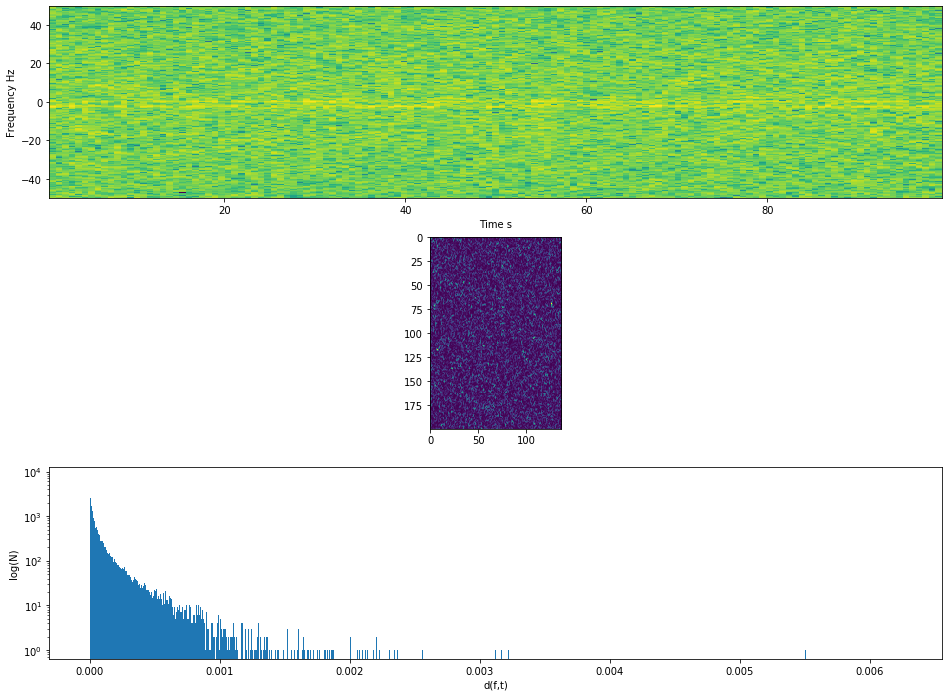

In [21]:
n1 = difference_chunk(0,10000)

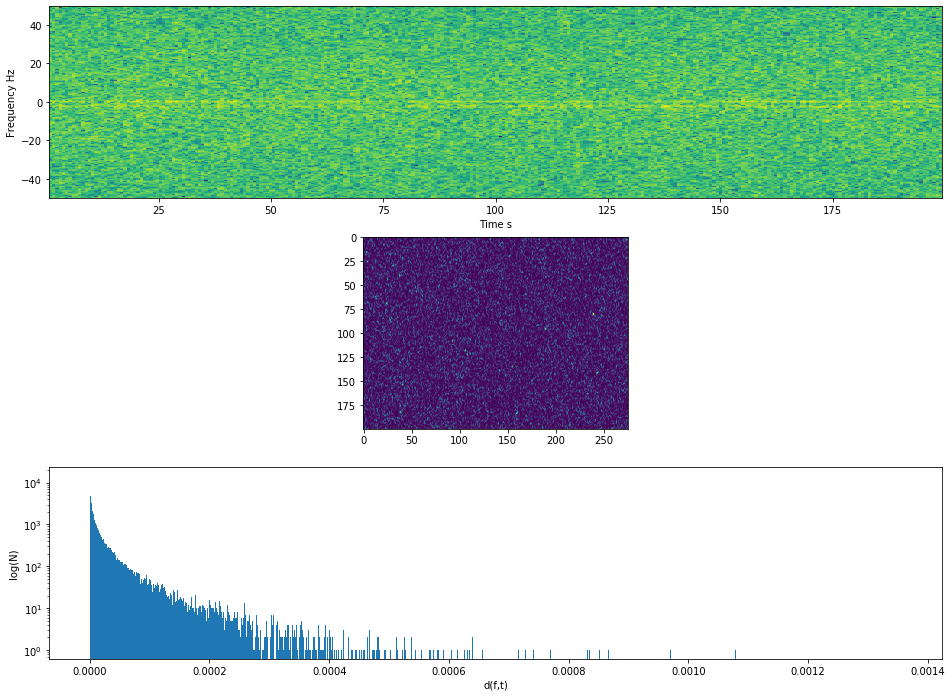

In [7]:
n2 = difference_chunk(10001,20000)

In [23]:
n1

array([8.070e+03, 2.566e+03, 1.704e+03, ..., 0.000e+00, 0.000e+00,
       1.000e+00])

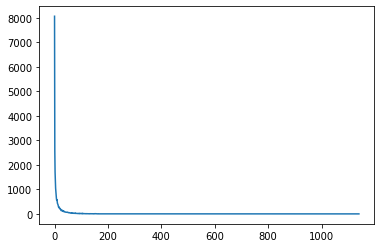

In [24]:
plt.plot(n1)